In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycm import ConfusionMatrix
sns.set_style("whitegrid")
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from astropy.table import Table

import keras
from keras import Sequential
from keras.layers import Dense

from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_hdf("data.h5","df")
#df['class']=df['class'].astype(str)
print("Length of the data before dropping the nans...", len(df))
df.dropna(axis='columns')
print("Length of the data after dropping the nans...", len(df))

df.head()
keys = ['LOGG', 'TEFF', 'ALPHA_M', 'M_H', 'C_FE', 'N_FE',  \
           'G', 'BP', 'RP', 'J', 'H', 'K', 'class']

Length of the data before dropping the nans... 4866
Length of the data after dropping the nans... 4866


In [3]:
df = df[keys]
len(np.where(df['class']==0)[0])

df_pos = df[df['class']==1]
df_neg = df[df['class']==0]
print('negatives: ', len(df_neg))
print('positives: ', len(df_pos))

df_pos_feat = df_pos.drop(columns='class')
df_neg_feat = df_neg.drop(columns='class')

df_neg.describe()

negatives:  1918
positives:  2948


,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,G,BP,RP,J,H,K,class
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.0
mean,2.410115,4756.719727,0.047890,-0.024053,-0.037272,0.298676,11.889413,12.470522,11.161177,10.093569,9.546496,9.425243,0.0
std,0.157805,154.522369,0.063693,0.230524,0.101504,0.107123,1.251434,1.165121,1.170745,0.894369,0.893936,0.896869,0.0
min,1.293466,3925.591309,-0.044435,-2.373403,-0.639198,-0.869691,9.126509,9.644998,8.479060,7.543000,7.014000,6.892000,0.0
25%,2.388086,4683.398926,0.007696,-0.162279,-0.106839,0.231287,11.216951,11.828963,10.513301,9.541500,8.992250,8.854000,0.0
50%,2.431180,4782.086914,0.026951,-0.006026,-0.041152,0.297023,11.869152,12.495577,11.150009,10.170000,9.631500,9.506500,0.0
75%,2.475260,4859.756714,0.063793,0.137840,0.031114,0.361697,12.507412,13.109290,11.785266,10.785000,10.238750,10.128750,0.0
max,2.963185,5138.701660,0.502731,0.532326,0.518988,0.858847,19.674227,19.636444,18.091848,12.268000,11.731000,11.663000,0.0


13


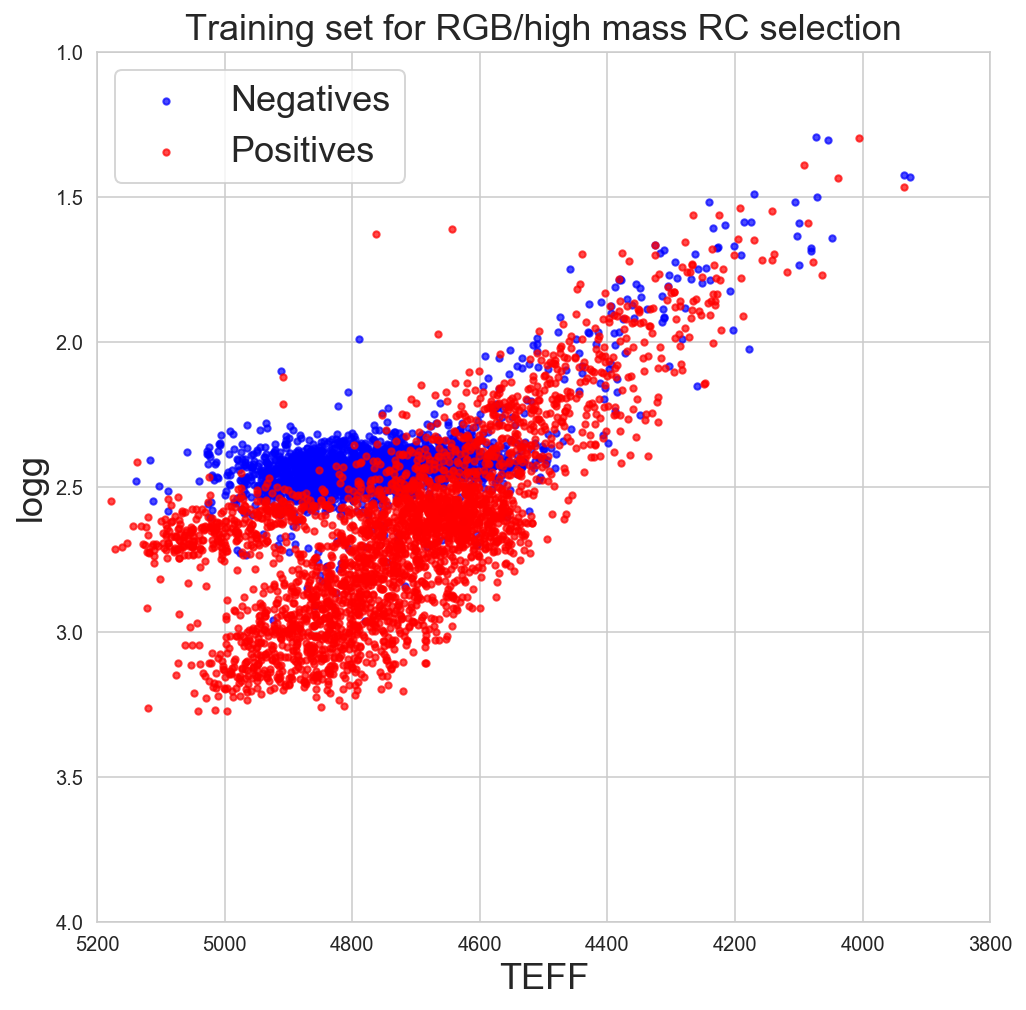

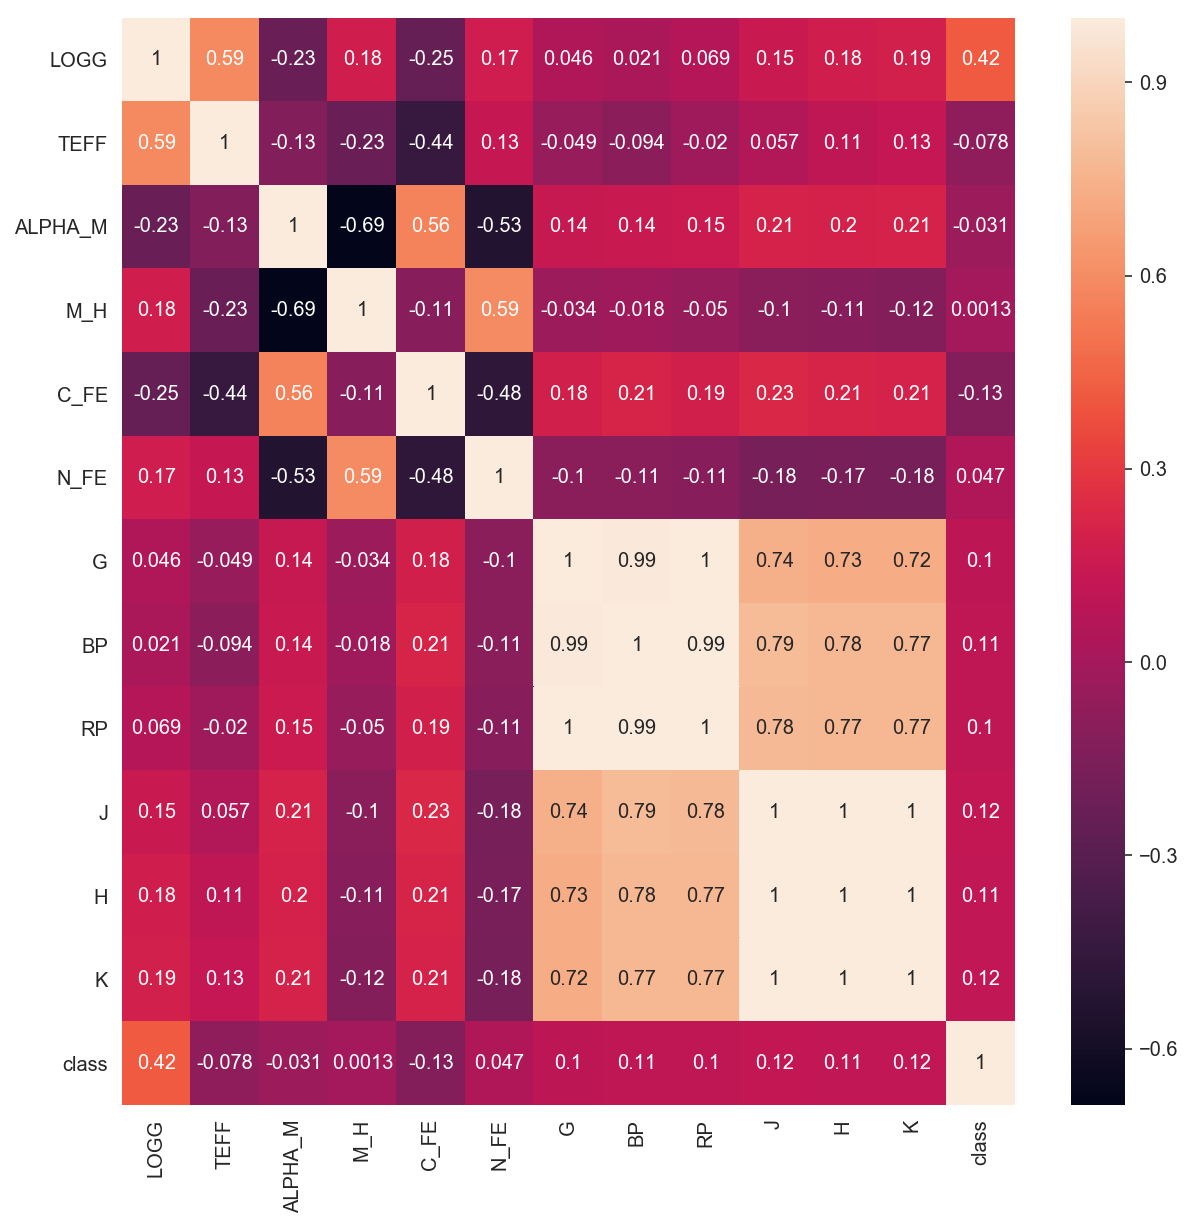

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
plt.scatter(df_neg['TEFF'], df_neg['LOGG'], color='b', s=10, alpha=0.7, label='Negatives')
plt.scatter(df_pos['TEFF'], df_pos['LOGG'], color='r', alpha=0.7, s=10, label='Positives')
plt.xlim(5200, 3800)
plt.ylim(4, 1)
plt.legend(loc='best', fontsize=18)
plt.xlabel('TEFF', fontsize=18)
plt.ylabel('logg', fontsize=18)
plt.title('Training set for RGB/high mass RC selection', fontsize=18)

#df.describe(include='all')
#sns.pairplot(df, hue='class')

fig = plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(), annot=True)

print(len(df.columns))


In [5]:
X = df.drop(columns='class')
y = df['class']

print(y.shape)
X.head(2)
print(X.shape)

sc = StandardScaler()
X = sc.fit_transform(X);
print(X.shape)

print(sc.mean_)

(4866,)
(4866, 12)
(4866, 12)
[ 2.55726516e+00  4.74007832e+03  4.53816434e-02 -2.36720221e-02
 -5.22783533e-02  3.05629338e-01  1.20513126e+01  1.26318679e+01
  1.13171765e+01  1.02255010e+01  9.67350145e+00  9.55306370e+00]
(3406, 12)
(3406,)
(1460, 12)
(1460,)


/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# This has been run on Nov 26th, 2019. Not necessary to run again

In [8]:
#Making and compiling the neural network
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test', X_test)
np.save('y_test', y_test)

model = Sequential()
#First Hidden Layer
model.add(Dense(32, activation='relu', kernel_initializer='random_normal', input_dim=12))
#Second  Hidden Layer
model.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
#Output Layer

model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

# Training parameters
batch_size = 32 # number of images per epoch
num_epochs = 100 # number of epochs
validation_split = 0.2

#Fitting the data to the training dataset
history = model.fit(X_train,y_train, 
                         batch_size=batch_size, 
                         epochs=num_epochs, 
                         validation_split=validation_split, 
                         verbose=True)

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# Run this only

In [16]:
X_train = np.load('X_train')
X_test = np.load('X_test')
y_train = np.load('y_train')
y_test = np.load('y_test')

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")

model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

loss_train, acc_train  = model.evaluate(X_train, y_train, verbose=False)
loss_test, acc_test  = model.evaluate(X_test, y_test, verbose=False)
print(f'Train acc/loss: {acc_train:.3}, {loss_train:.3}')
print(f'Test acc/loss: {acc_test:.3}, {loss_test:.3}')

Loaded model from disk


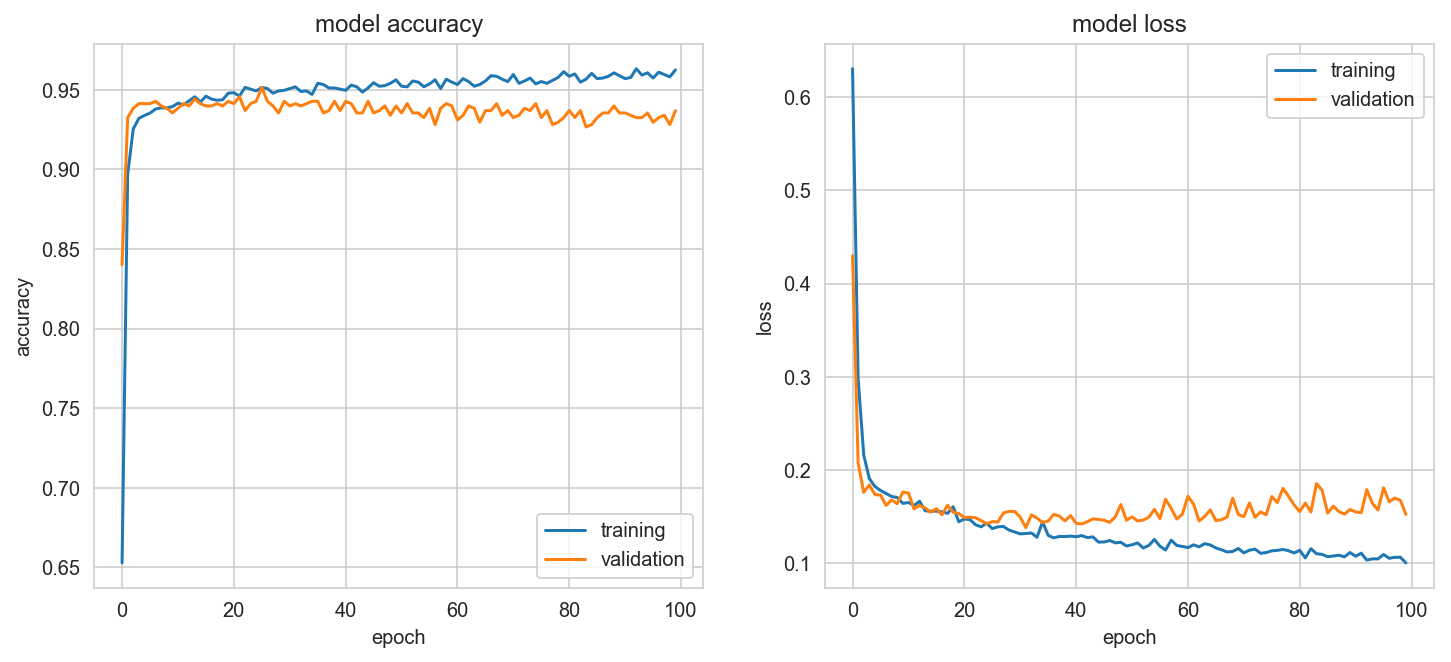

In [18]:
# set up figure
f = plt.figure(figsize=(12,5))
f.add_subplot(1,2, 1)

# plot accuracy as a function of epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

# plot loss as a function of epoch
f.add_subplot(1,2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show(block=True)

(array([1110.,   71.,   37.,   33.,   32.,   46.,   50.,   45.,  109.,
        1873.]),
 array([1.1041264e-07, 1.0000009e-01, 2.0000006e-01, 3.0000004e-01,
        4.0000001e-01, 5.0000000e-01, 5.9999996e-01, 6.9999993e-01,
        7.9999995e-01, 8.9999992e-01, 9.9999988e-01], dtype=float32),
 <a list of 10 Patch objects>)

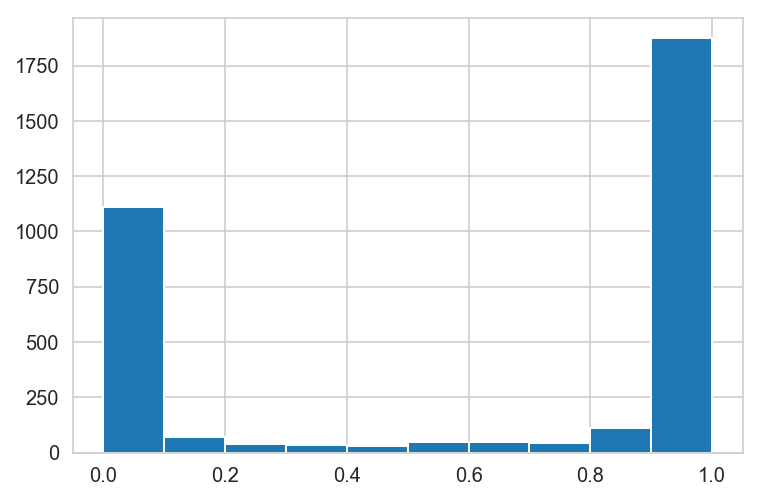

In [19]:
y_pred_train = model.predict(X_train).ravel()
plt.hist(y_pred_train)
#y_pred_test = model.predict(X_test,verbose=True)

Text(0.5, 1.0, 'Training set for RGB/high mass RC selection')

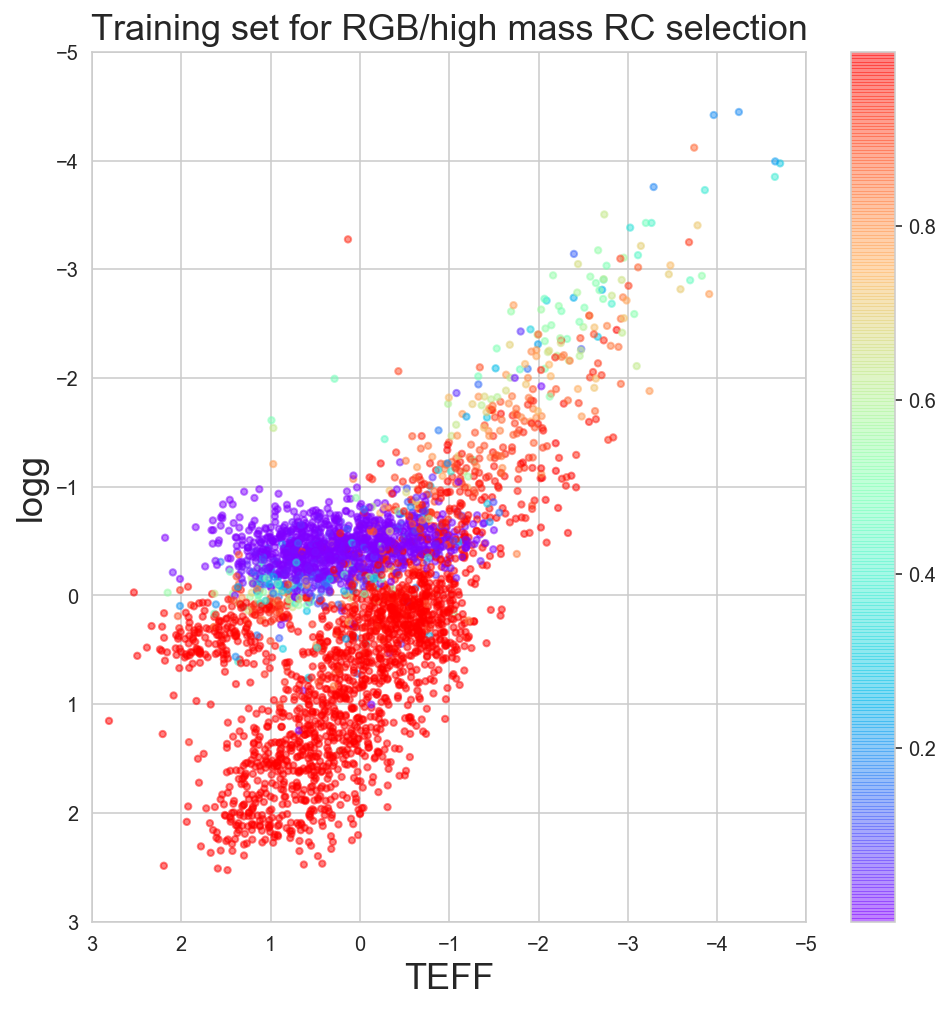

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
plt.scatter(X_train[:, 1], X_train[:, 0], c=y_pred_train, alpha=0.5, cmap='rainbow', s=10)

plt.colorbar()
plt.xlim(3, -5)
plt.ylim(3, -5)

plt.xlabel('TEFF', fontsize=18)
plt.ylabel('logg', fontsize=18)
plt.title('Training set for RGB/high mass RC selection', fontsize=18)

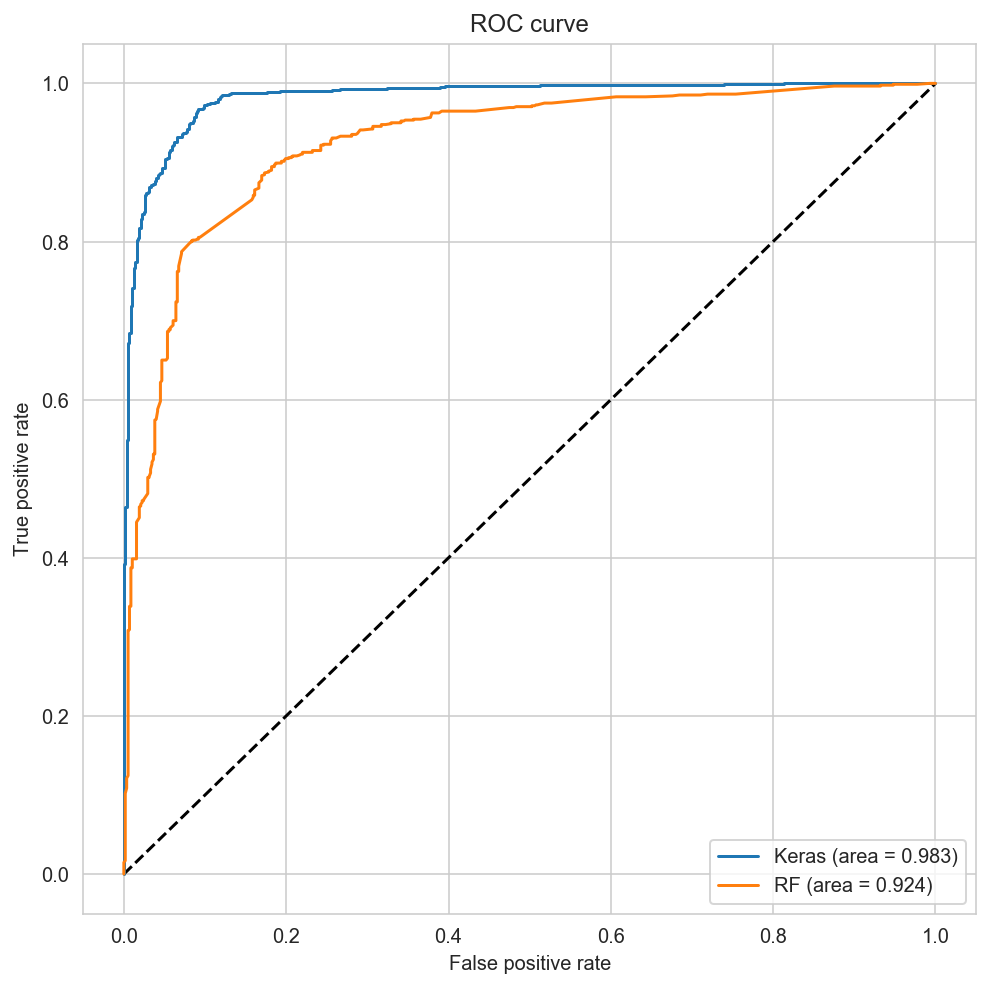

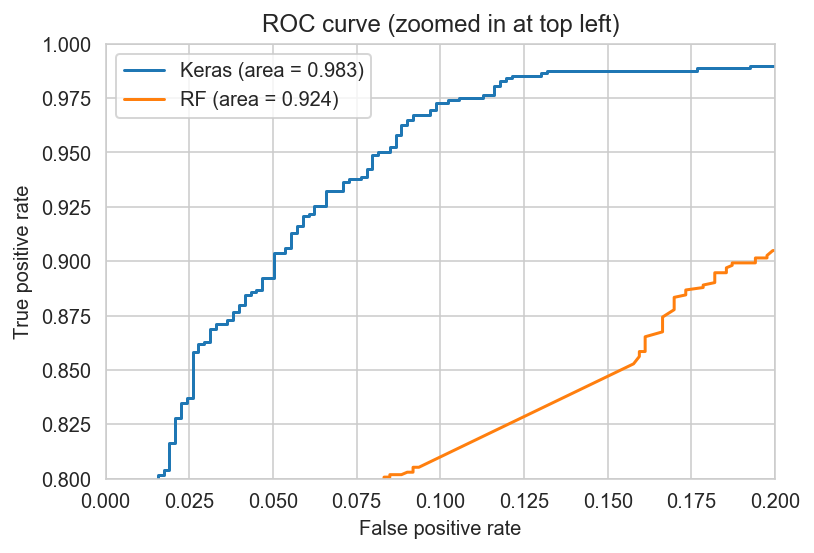

In [22]:
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 8))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Test set for RGB/high mass RC selection')

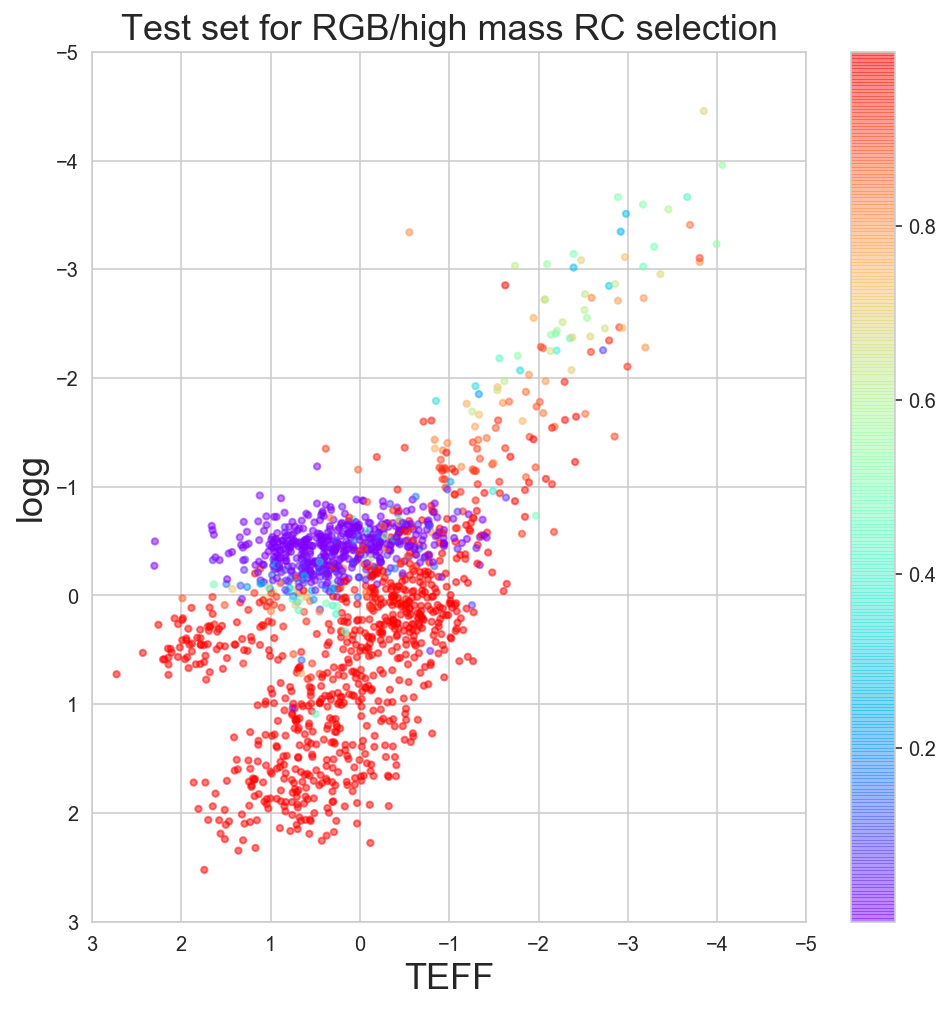

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
plt.scatter(X_test[:, 1], X_test[:, 0], c=y_pred_keras, alpha=0.5, cmap='rainbow', s=10)

plt.colorbar()
plt.xlim(3, -5)
plt.ylim(3, -5)

plt.xlabel('TEFF', fontsize=18)
plt.ylabel('logg', fontsize=18)
plt.title('Test set for RGB/high mass RC selection', fontsize=18)

In [24]:
df_pos_feat = sc.transform(df_pos_feat)
df_neg_feat = sc.transform(df_neg_feat)

y_pred_train_pos = model.predict(df_pos_feat).ravel()
y_pred_train_neg = model.predict(df_neg_feat).ravel()

/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  


Text(0.5, 1.0, 'Training set for RGB/high mass RC selection')

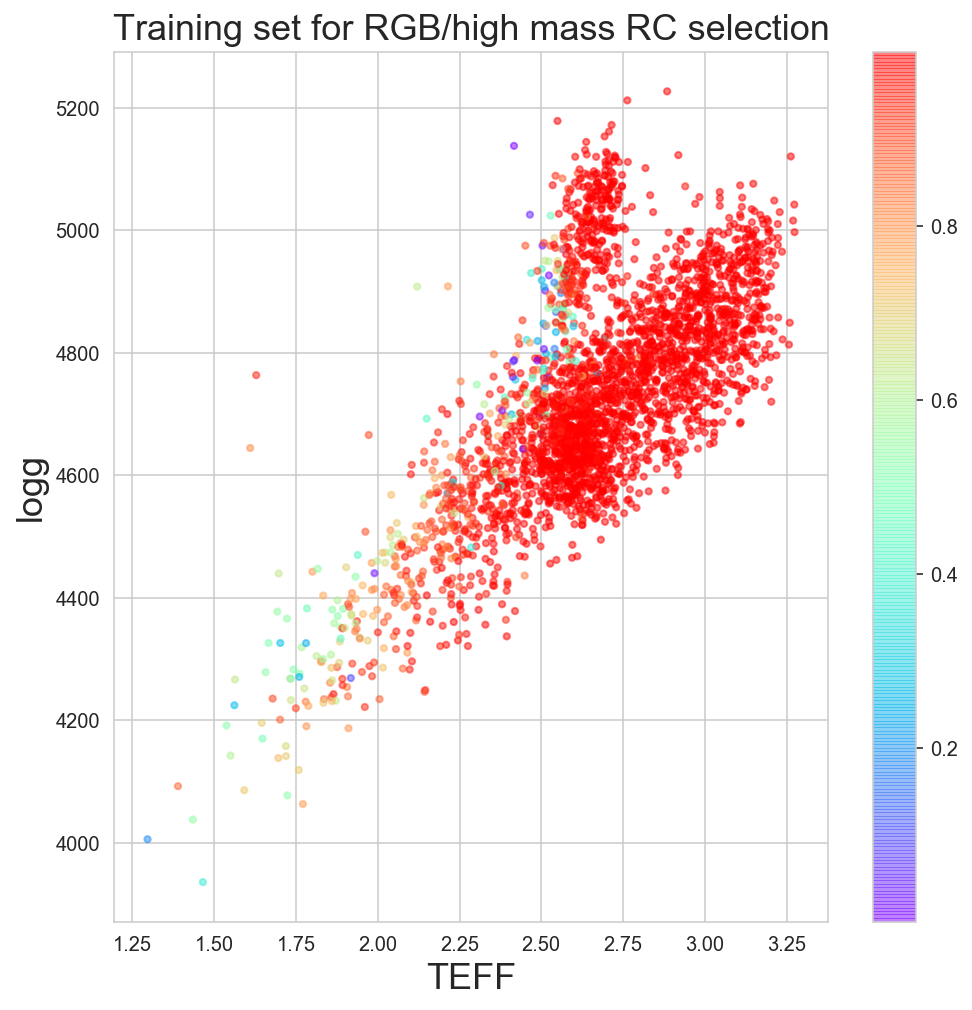

In [25]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(df_pos['LOGG'], df_pos['TEFF'], c=y_pred_train_pos, alpha=0.5, cmap='rainbow', s=10)
#plt.scatter(df_neg['LOGG'], df_neg['TEFF'], c=y_pred_train_neg, alpha=0.5, cmap='rainbow', s=10)
plt.colorbar()

plt.xlabel('TEFF', fontsize=18)
plt.ylabel('logg', fontsize=18)
plt.title('Training set for RGB/high mass RC selection', fontsize=18)

Text(0.5, 1.0, 'Training set for RGB/high mass RC selection')

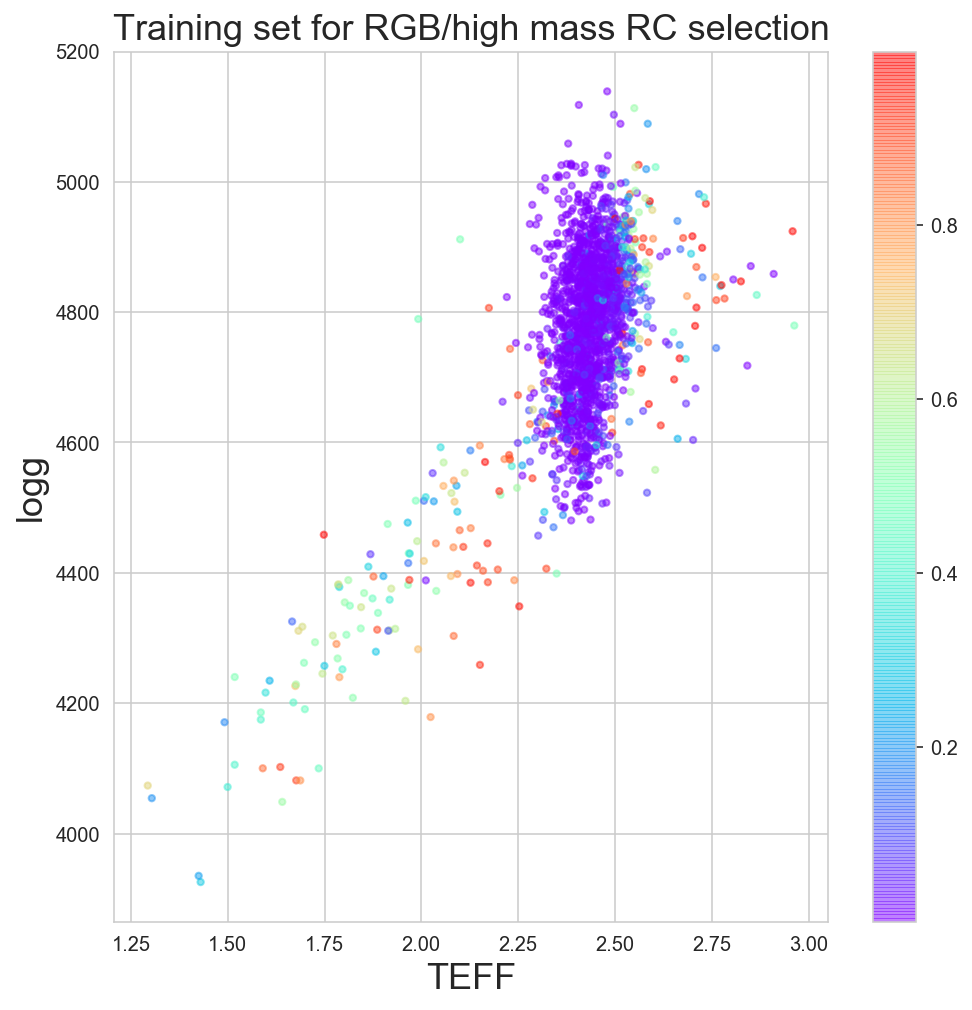

In [26]:
fig = plt.figure(figsize=(8, 8))
#plt.scatter(df_pos['LOGG'], df_pos['TEFF'], c=y_pred_train_pos, alpha=0.5, cmap='rainbow', s=10)
plt.scatter(df_neg['LOGG'], df_neg['TEFF'], c=y_pred_train_neg, alpha=0.5, cmap='rainbow', s=10)
plt.colorbar()

plt.xlabel('TEFF', fontsize=18)
plt.ylabel('logg', fontsize=18)
plt.title('Training set for RGB/high mass RC selection', fontsize=18)

# Have to obtain estimates on the SD data with an AK_TARG cut of 0.1 and no SNR cut

In [58]:
path = '../data/pred_ApplicationData_akTargCut.fits'
newData = Table.read(path)
newData = newData.to_pandas()

new_keys = ['LOGG', 'TEFF', 'ALPHA_M', 'M_H', 'C_FE', 'N_FE', \
           'G', 'BP', 'RP', 'J', 'H', 'K']
testData = newData[new_keys]
normTestData = sc.transform(testData)
new_y_pred =  model.predict_proba(normTestData).ravel()

newData['prob'] = new_y_pred
newData.to_csv('../data/pred_ApplicationData_akTargCut_withprob_New.csv')

/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  


In [47]:
#newData.head()
#means = sc.mean_
#stds = sc.scale_
#high_prob = np.where(new_y_pred >= 0.99)[0]